In [179]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2 as cv

# defined
from utility_function import img_resize, model_namer, model_namer_description, save_ml_model, load_ml_model, load_training_data

In [236]:
# model testing

# filename = '3d_cnn2.h5'
# filename = '3d_cnn3.h5'
# img_resize_factor = 100

# filename = 'cnn3d_100_5_1.75e-14_100_1_relu_50.h5'
# filename = 'cnn3d_100_5_1.75e-14_50_1_relu_50.h5'
# filename = 'cnn3d_1000_5_1.75e-14_40_1_tanh_1.h5'
# filename = 'cnn2d_1000_5_1.75e-14_50_1_relu_100.h5'
# filename = 'cnn2d_1000_5_1.75e-14_100_1_tanhmax_100.h5'
# filename = 'cnn3d_2000_5_1.75e-14_50_1_relu-dense_1.pkl'
# filename = 'cnn2d_1000_5_1.75e-14_50_255_max_100.pkl'
# filename = 'cnn2d_1000_5_1.75e-14_50_255_max_100.pkl'
# filename = 'cnn2d_v1_1000_5_1.75e-14_50_max-based_100.pkl'
# filename = 'cnn2d_v2_1000_5_1.75e-14_50_shrinkX_100.pkl'
# filename = 'cnn3d_v1_1000_5_1.75e-14_50_shrinkX-tanh_10.pkl' # do not predict anything
# filename = 'cnn2d_v3_1000_5_1.75e-14_50_stack-2d_10.pkl' # do not predict anything
# filename = 'cnn2d_v3_1000_5_1.75e-14_50_no-pooling_100.pkl' # do not predict anything
filename = 'cnn2d_v4_1000_5_1.75e-14_50_pooling_100.pkl'
# filename = 'cnn3d_v2_1000_5_1.75e-14_50_pooling_100.pkl'
# filename = 'cnn3d_v3_1000_5_1.75e-14_50_2-3dconv_100.pkl' # do not predict anything

info = model_namer_description(filename)
model = load_ml_model(filename)
model.summary()

Model description:
 
                - Dimension: 2
 
                - Version: v4

                - Number of samples: 1000

                - FMC subsampling frequency: 5

                - FMC scaler: 1.75e-14

                - Img resize factor: 50

                - Remark: pooling

                - Epochs: 100

    
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 895, 256, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 891, 254, 1)       16        
                                                                 
 dropout_1 (Dropout)         (None, 891, 254, 1)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 445, 127, 1)      0         
 )                                                        

In [239]:
x_dimension = int(info['Dimension'])
img_resize_factor = int(info['img_resize'])
epochs = int(info['epochs'])
shrinkx = False

X, y = load_training_data(num_sample=2000, 
                          x_dimension=x_dimension, 
                          img_resize_factor=img_resize_factor,
                          shrinkx = shrinkx)

The shape of X is (2000, 895, 256, 1)
The shape of y is (2000, 7200)


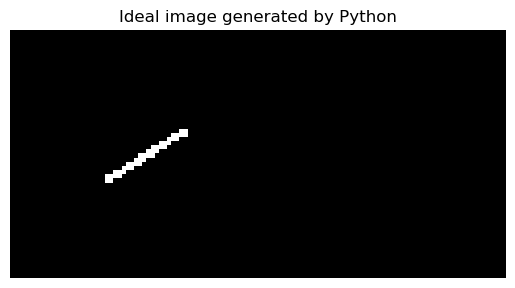

2023-02-02 13:02:47.086441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 301ms/step


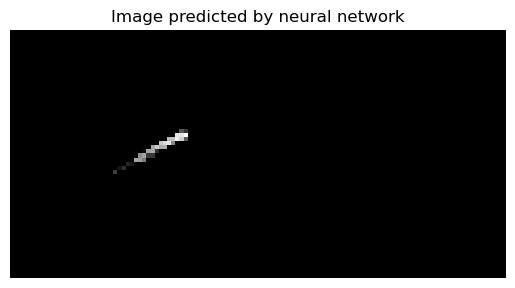

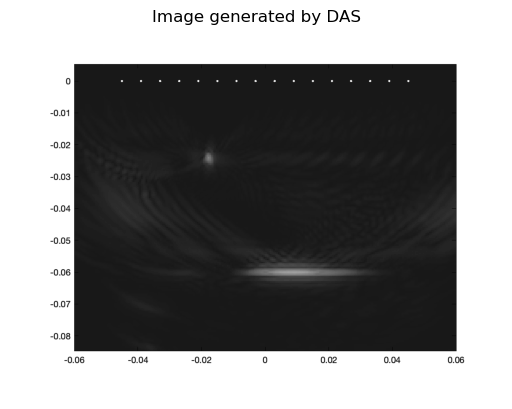

In [240]:
# 1078 # 1073 # 1070
num_test = 1073
threshold = -0.1 
stack = False

true_img = y[num_test].reshape(int(120*img_resize_factor/100), int(240*img_resize_factor/100))
fig, ax = plt.subplots()
ax.imshow(true_img, cmap ='gray')
plt.title('Ideal image generated by Python')
plt.axis('off')
plt.show()

if shrinkx == True:
    xshape = 865
else:
    xshape = 895

if x_dimension == 3:
    ypred = model.predict(X[num_test].reshape(-1, xshape, 16, 16, 1))
elif x_dimension == 2:
    if stack == True:
        ypred = model.predict(X[num_test].reshape(-1, xshape, 16, 16))
    else:
        ypred = model.predict(X[num_test].reshape(-1, xshape, 16*16, 1))
    
ypred[ypred <= threshold] = 0
ypred[ypred > threshold] = np.abs(ypred[ypred > threshold])*255
img = ypred.reshape(int(120*img_resize_factor/100), int(240*img_resize_factor/100))
fig, ax = plt.subplots()
ax.imshow(img, cmap ='gray')
plt.title('Image predicted by neural network')
plt.axis('off')
plt.show()

dirName_das_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC"
# Read image in greyscale 
image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{num_test+1}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array

plt.imshow(image_das_fmc, cmap='gray')
plt.title('Image generated by DAS')
plt.axis('off')
plt.show()

In [62]:
np.sum(ypred)

0.0